In [1]:
from __future__ import print_function

import sys
import pyodbc
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#!pip install ipython-autotime
%load_ext autotime

## Generate 10 return series with a 4% POT

In [2]:
daily = pd.DataFrame(np.random.rand(100, 10), columns=list('ABCDEFGHIJ'))
daily = (daily * 10) -5 + .4
daily.head()

A         B         C         D         E         F         G  \
0 -0.760853  5.220931 -0.982377  1.613960  2.597344 -1.103621  5.273449   
1  3.153932 -0.508719 -0.126232  4.817959  1.974107  4.833645  2.947922   
2 -0.322308 -3.231647  1.637557 -1.209478  0.475461  5.273795  2.690917   
3  0.027525 -0.293318 -0.565289 -0.855462  2.059996  1.083120 -3.529599   
4 -2.510910  1.041521 -4.486138 -4.257116  1.620288 -2.486921  5.178457   

          H         I         J  
0 -2.006166 -1.541764 -3.606395  
1 -0.245639  1.028022 -4.097719  
2  1.054997 -3.549842 -0.321102  
3 -0.707421  4.640611  3.096652  
4 -1.219147 -2.295263 -1.952580

time: 75.8 ms


## Display daily returns

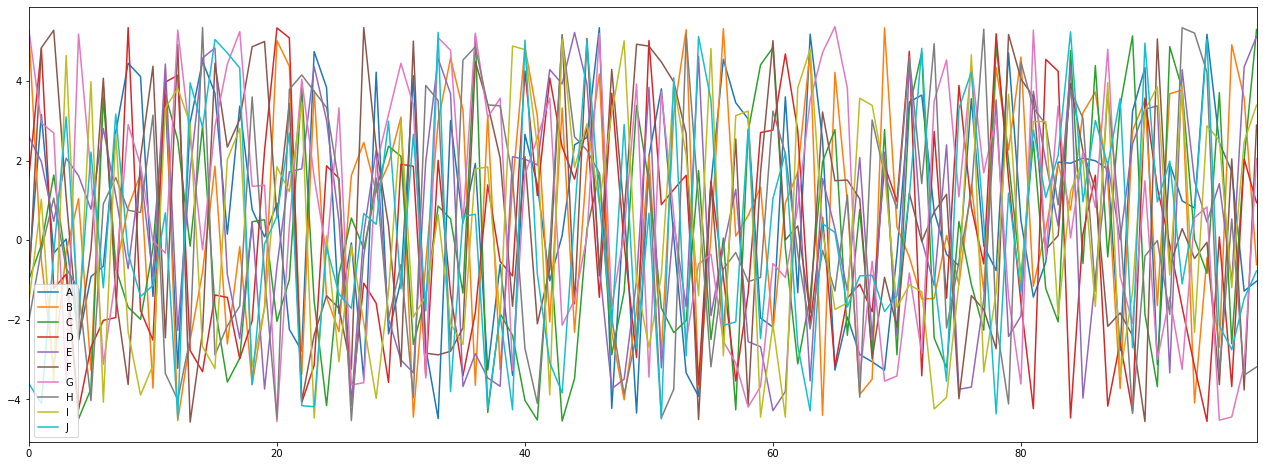

time: 636 ms


In [3]:
daily.plot(figsize=(22,8))

In [4]:
equity = pd.DataFrame(index=daily.index, columns=daily.columns)
for (columnName, _) in daily.iteritems():
    equity[columnName] = daily[columnName].cumsum()
equity.head()

A         B         C         D         E          F          G  \
0 -0.760853  5.220931 -0.982377  1.613960  2.597344  -1.103621   5.273449   
1  2.393079  4.712212 -1.108610  6.431919  4.571451   3.730024   8.221370   
2  2.070772  1.480565  0.528947  5.222441  5.046912   9.003819  10.912288   
3  2.098297  1.187247 -0.036342  4.366979  7.106908  10.086939   7.382689   
4 -0.412613  2.228769 -4.522481  0.109863  8.727196   7.600018  12.561146   

          H         I         J  
0 -2.006166 -1.541764 -3.606395  
1 -2.251805 -0.513743 -7.704115  
2 -1.196807 -4.063584 -8.025216  
3 -1.904229  0.577027 -4.928564  
4 -3.123376 -1.718236 -6.881144

time: 29.9 ms


## Display cumulative returns

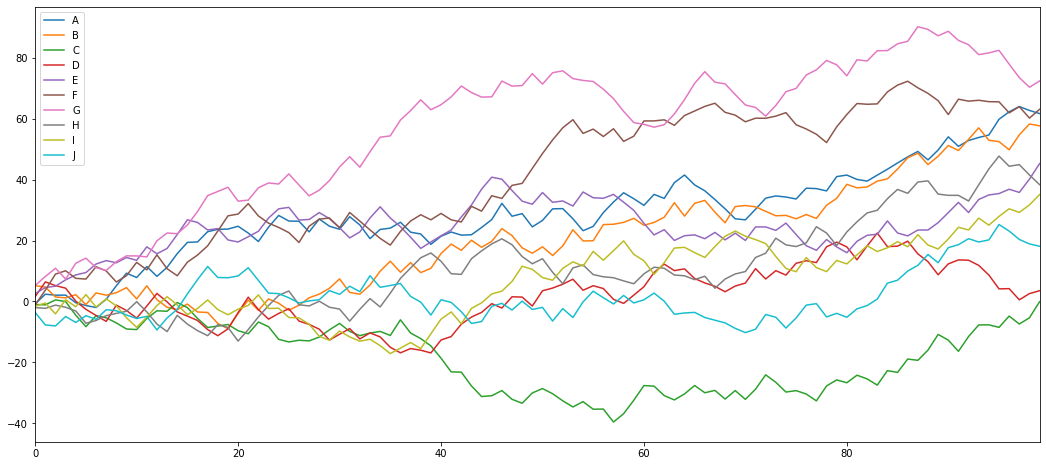

time: 378 ms


In [5]:
equity.plot(figsize=(18,8))

## Display combined returns

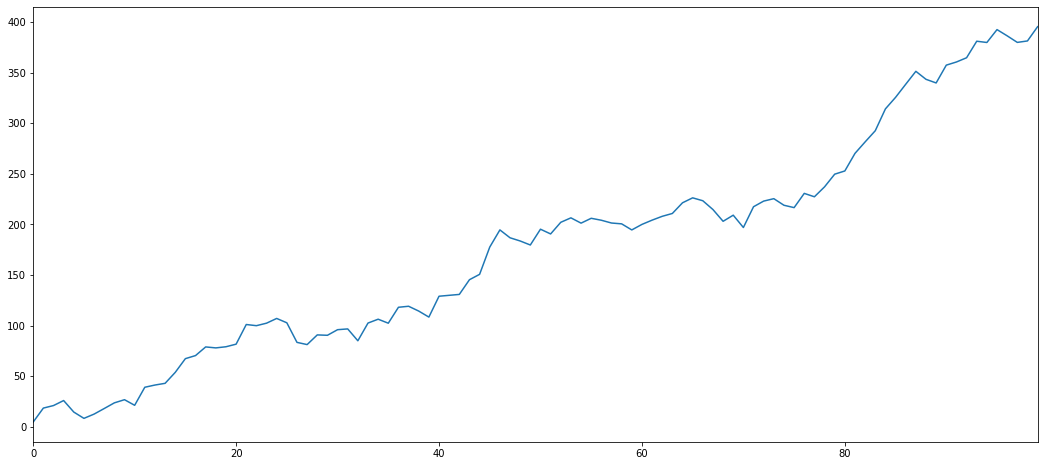

time: 245 ms


In [6]:
equity.sum(axis = 1).plot(figsize=(18,8))